In [23]:
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
labels=[x for x in train['labels']]
labels.extend([x for x in valid['labels']])
labels.extend([x for x in test['labels']])
X_train_norm=[]
##print(len(valid['labels']))
##print(len(test['labels']))
##print(len(labels))
labels_set=set(labels)
##print(len(label_set))
## X_train=(X_train-128)/128
## X_valid=(X_valid-128)/128

In [24]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of a traffic sign image?
image_shape = X_train[0].shape ##(len(train['features'][0]),len(train['features'][0][0]),len(train['features'][0][0][0]))

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(labels_set)
##print(X_train[0].shape)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

def normalize(data):
    a=0.1
    b=0.9
    data = data.astype(np.int16)
    data=a+data*(b-a)/255
    ##data=(data-128)/128
    print(data.shape)
    return data

def im2gray(data):
    gray_data=[]
    for im in data:
        gray=cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
        gray_data.append(gray)
    gray_data=np.array(gray_data)
    print(gray_data.shape)
    ##data=0.2989 *data[:,:,:,0] + 0.5870 * data[:,:,:,1] + 0.1140 * data[:,:,:,2]
    plt.imshow(gray_data[len(gray_data)-1],cmap='gray')
    plt.savefig('./training_img_gr.jpg')
    gray_data=gray_data[...,np.newaxis]
    print(gray_data.shape)
    return data

##### Normalizing Data
Between 0.1 to 0.9

In [141]:
X_train=normalize(X_train)
X_valid=normalize(X_valid)
print(X_train.shape)
print(X_valid.shape)

(104397, 32, 32, 3)
(4410, 32, 32, 3)
(104397, 32, 32, 3)
(4410, 32, 32, 3)


##### Rotating and adding new images to the data


In [26]:
from scipy import ndimage

print(X_train.shape)
print(y_train.shape)

def rotate(image,angle):
    rotated = ndimage.rotate(image,angle)
    left=0
    right=rotated.shape[1]
    mid_x=(right-left)/2
    left=int(mid_x-16)
    right=left+32
    up=0
    bottom=rotated.shape[0]
    mid_y=(bottom-up)/2
    up=int(mid_y-16)
    bottom=up+32
    new_rot=rotated[left:right,up:bottom,:]
    return new_rot
    
##plt.imshow(rotate(X_train[1079],45))

lower_bound=1200
bins=np.bincount(y_train)
augment_x=[]
augment_y=[]
num_examples = len(X_train)
BATCH_SIZE = 128
print("Augmenting... on "+str(num_examples)+" examples")
print()
for offset in range(0, num_examples, BATCH_SIZE):
    end = offset + BATCH_SIZE
    if end>=num_examples:
        end=num_examples
    for i in range(offset,end):
        for ang in range(-15,40,30):
            temp=rotate(X_train[i],ang)
            augment_x.append(temp)
            augment_y.append(y_train[i])
    print("Finished till "+str(end)+" batch")
    
'''
for i in range(n_train):
    for ang in range(10,40,15):
        temp=rotate(X_train[i],ang)
        np.append(X_train,temp)
        np.append(y_train,y_train[i])
'''

print(X_train.shape)
print(y_train.shape)
augment_x=np.array(augment_x)
augment_y=np.array(augment_y)
print(augment_x.shape)
print(augment_y.shape)

(34799, 32, 32, 3)
(34799,)
Augmenting... on 34799 examples

Finished till 128 batch
Finished till 256 batch
Finished till 384 batch
Finished till 512 batch
Finished till 640 batch
Finished till 768 batch
Finished till 896 batch
Finished till 1024 batch
Finished till 1152 batch
Finished till 1280 batch
Finished till 1408 batch
Finished till 1536 batch
Finished till 1664 batch
Finished till 1792 batch
Finished till 1920 batch
Finished till 2048 batch
Finished till 2176 batch
Finished till 2304 batch
Finished till 2432 batch
Finished till 2560 batch
Finished till 2688 batch
Finished till 2816 batch
Finished till 2944 batch
Finished till 3072 batch
Finished till 3200 batch
Finished till 3328 batch
Finished till 3456 batch
Finished till 3584 batch
Finished till 3712 batch
Finished till 3840 batch
Finished till 3968 batch
Finished till 4096 batch
Finished till 4224 batch
Finished till 4352 batch
Finished till 4480 batch
Finished till 4608 batch
Finished till 4736 batch
Finished till 4864 ba

(34799, 32, 32)
(34799, 32, 32, 1)


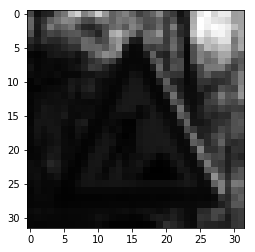

In [28]:
plt.imshow(X_train[34798])
plt.savefig('./training_im.jpg')
X_train_gr=im2gray(X_train)
##plt.imshow(X_train_gr[34798],cmap='gray')

In [29]:
print(X_train.shape)
print(y_train.shape)
X_train=np.append(X_train,augment_x,axis=0)
y_train=np.append(y_train,augment_y,axis=0)
bins=np.bincount(y_train)
## print(bins)
print(X_train.shape)
print(y_train.shape)
##plt.imshow(X_train[34799])
##plt.imshow(X_train_aug[34800])

(34799, 32, 32, 3)
(34799,)
(104397, 32, 32, 3)
(104397,)


[[[0.53921569 0.39176471 0.34156863]
  [0.56745098 0.40745098 0.3572549 ]
  [0.56745098 0.41686275 0.36980392]
  ...
  [0.81215686 0.75568627 0.64588235]
  [0.86235294 0.78705882 0.69607843]
  [0.84980392 0.76823529 0.69921569]]

 [[0.56117647 0.41686275 0.36980392]
  [0.56745098 0.41686275 0.36980392]
  [0.58627451 0.42313725 0.37921569]
  ...
  [0.59882353 0.61137255 0.5454902 ]
  [0.79333333 0.74627451 0.66784314]
  [0.84666667 0.77764706 0.69607843]]

 [[0.79960784 0.73686275 0.69607843]
  [0.76509804 0.69607843 0.63647059]
  [0.7745098  0.66470588 0.59882353]
  ...
  [0.43254902 0.42627451 0.39490196]
  [0.76823529 0.71490196 0.64901961]
  [0.86235294 0.77764706 0.69294118]]

 ...

 [[0.76509804 0.67411765 0.62392157]
  [0.58313725 0.45137255 0.41686275]
  [0.58       0.45764706 0.42      ]
  ...
  [0.78078431 0.83411765 0.84039216]
  [0.61764706 0.59882353 0.63647059]
  [0.35098039 0.39176471 0.44196078]]

 [[0.83411765 0.75568627 0.69921569]
  [0.63333333 0.48588235 0.44823529]


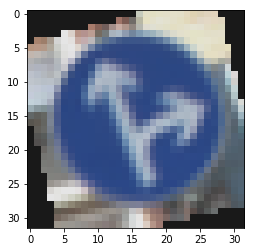

In [50]:
plt.imshow(X_train[1079])
print((X_train[1079]))
plt.savefig('./training_img.jpg')
print(y_train[1080])
print(y_train[36959])
plt.imshow(X_train[36957])
plt.savefig('./training_img_+15.jpg')
plt.imshow(X_train[36956])
plt.savefig('./training_img_-15.jpg')

In [12]:
## Saving Augmented data

f = open('train_a.p', 'wb')
pickle.dump(X_train,f)
f.close()

(34799, 32, 32)
(34799, 32, 32, 1)


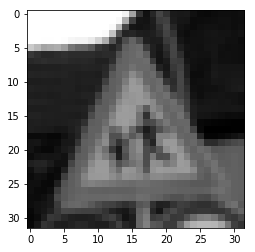

In [25]:
X_train_gr=im2gray(X_train)

(4410, 32, 32)
(4410, 32, 32, 1)


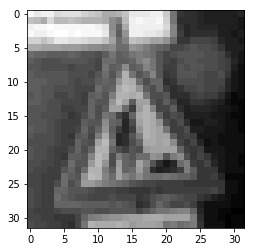

In [26]:
X_valid_gr=im2gray(X_valid)

### My Model

In [30]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x20.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 20), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(20))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x20. Output = 14x14x20.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional.14x14x20  Output = 12x12x40.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 20, 40), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(40))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Layer 3: Convolutional.12x12x40  Output = 10x10x80.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 40, 80), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(80))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # SOLUTION: Activation.
    conv3 = tf.nn.relu(conv3)

    # SOLUTION: Pooling. Input = 10x10x80. Output = 5x5x80.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x80. Output = 400.
    fc0   = flatten(conv3)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 2000. Output = 200.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2000, 200), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(200))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    w = tf.Variable(tf.truncated_normal(shape=(200, 120), mean = mu, stddev = sigma))
    b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc1, w) + b

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

print('Model Created')

Model Created


In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)
'''
print(len(X_train))
print(len(y_train))
plt.imshow(X_train[56])
print(y_train[56])
'''
import tensorflow as tf

EPOCHS = 15


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)## loss 
optimizer = tf.train.AdamOptimizer(learning_rate = rate) 
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()
loss_valid=[]
loss_train=[]
epochs=[]
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss,accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})        
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples,total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training... on "+str(num_examples)+" examples")
    print()
    for i in range(EPOCHS):
        total_loss = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            loss,var=sess.run([loss_operation,training_operation], feed_dict={x: batch_x, y: batch_y,keep_prob:0.7})
            total_loss += (loss * len(batch_x))
        print("Training loss "+str(total_loss/num_examples))
        loss_train.append(total_loss/num_examples)
        ##train_loss,train_accuracy=evaluate(X_train, y_train)
        validation_loss,validation_accuracy = evaluate(X_valid, y_valid)
        ##loss_train.append(train_loss)
        loss_valid.append(validation_loss)
        epochs.append(i)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    
    plt.plot(epochs,loss_valid,epochs,loss_train)
    plt.xlabel('EPOCHS')
    plt.ylabel('LOSS')
    plt.savefig('./losscurve.jpg')
    saver.save(sess, './lenet')
    print("Model saved")
    test_loss,test_accuracy = evaluate(X_test, y_test)
    print("Testing Accuracy = {:.3f}".format(test_accuracy))
    print()


Training... on 104397 examples

Training loss 2.596646621302469
EPOCH 1 ...
Validation Accuracy = 0.760

Training loss 0.6027613429084244
EPOCH 2 ...
Validation Accuracy = 0.865

Training loss 0.33995004802380185
EPOCH 3 ...
Validation Accuracy = 0.919

Training loss 0.23456010804667501
EPOCH 4 ...
Validation Accuracy = 0.923

Training loss 0.18670206516759885
EPOCH 5 ...
Validation Accuracy = 0.941

Training loss 0.15656836439155555
EPOCH 6 ...
Validation Accuracy = 0.950

Training loss 0.12944523934694377
EPOCH 7 ...
Validation Accuracy = 0.959

Training loss 0.12297662790395712
EPOCH 8 ...
Validation Accuracy = 0.951

Training loss 0.10635980921032614
EPOCH 9 ...
Validation Accuracy = 0.963



#### Testing the model 

In [11]:
import tensorflow as tf

EPOCHS = 15


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)
rate = 0.001
BATCH_SIZE=128
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)## loss 
optimizer = tf.train.AdamOptimizer(learning_rate = rate) 
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        loss,accuracy = sess.run([loss_operation,accuracy_operation], feed_dict={x: batch_x, y: batch_y,keep_prob:1.0})        
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
    return total_loss/num_examples,total_accuracy / num_examples
print(X_test.shape)
print(y_test.shape)
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    print("Model restored.")
    test_loss,test_accuracy = evaluate(X_test, y_test)
    print("Testing Accuracy = {:.3f}".format(test_accuracy))
    print()

(12630, 32, 32, 3)
(12630,)
Model restored.
Testing Accuracy = 0.016

